In [1]:
%matplotlib notebook
%pylab
import pyroomacoustics as pra
import seaborn as sns

Using matplotlib backend: nbAgg
Populating the interactive namespace from numpy and matplotlib


In [2]:
room = pra.ShoeBox([6,4], fs=8000, max_order=15, absorption=0.1)
room.add_source([1,1])
room.add_microphone_array(pra.MicrophoneArray(np.array([[4,2.5]]).T, room.fs))
room.image_source_model()
room.compute_rir()

<IPython.core.display.Javascript object>


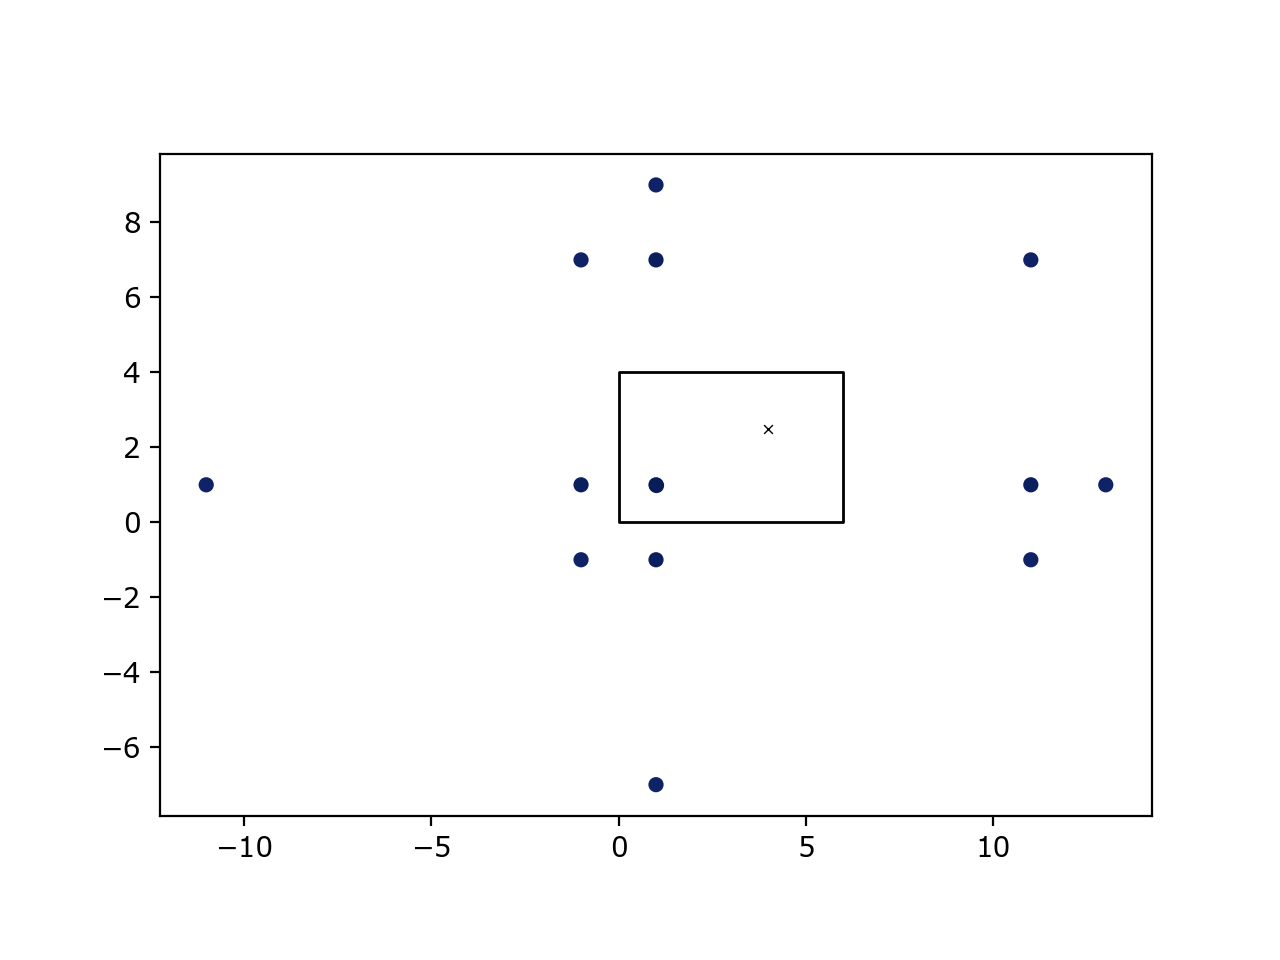

<IPython.core.display.Javascript object>


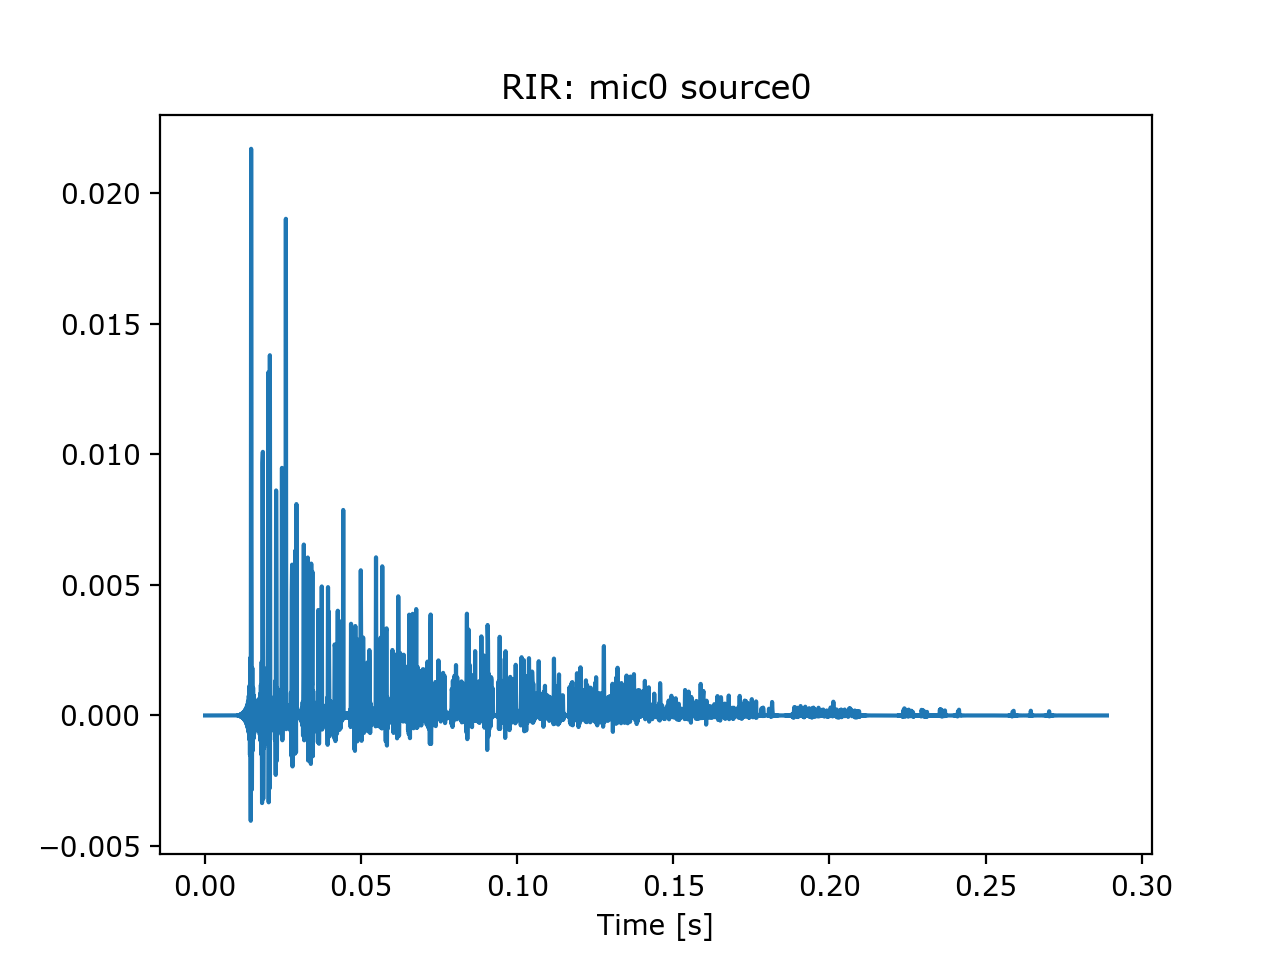

In [3]:
room.plot(img_order=2)
savefig('partial_rir_room.pdf', dpi=150)
figure()
room.plot_rir()

<IPython.core.display.Javascript object>


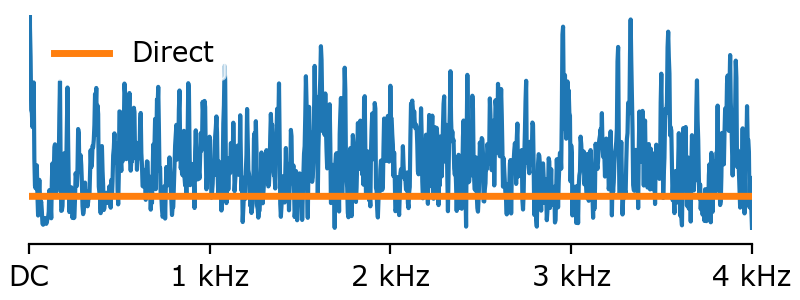

<IPython.core.display.Javascript object>


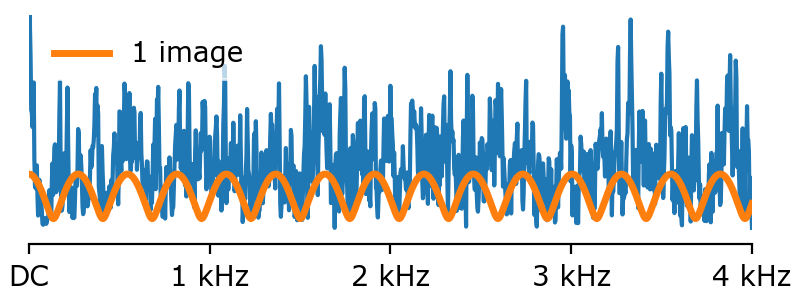

<IPython.core.display.Javascript object>


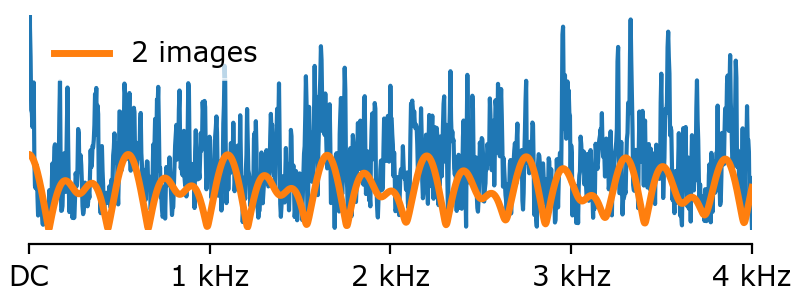

<IPython.core.display.Javascript object>


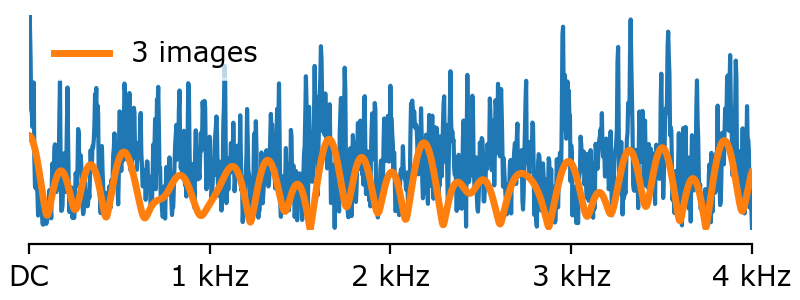

<IPython.core.display.Javascript object>


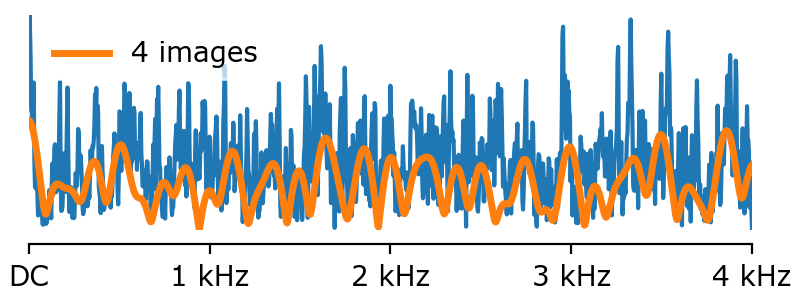

<IPython.core.display.Javascript object>


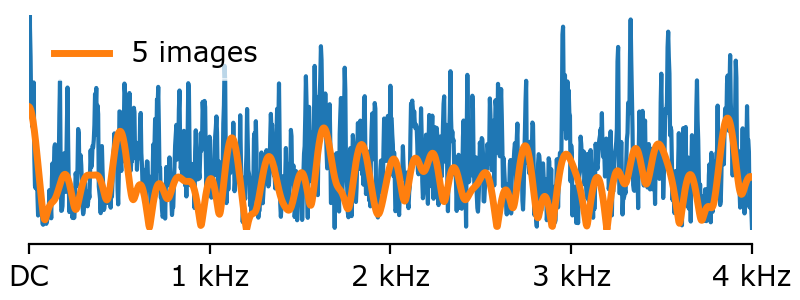

In [9]:
room.sources[0].set_ordering('nearest', ref_point=room.mic_array.R[:,0])
c = pra.constants.get('c')

figsize = (4,1.5)

n_plot = 5
for n in range(1,2+n_plot):
    #subplot(1,n_plot,n-1)
    figure(figsize=figsize)
    sources = room.sources[0][:n]
    delays = pra.distance(room.mic_array.R, sources.images) / c

    rir = room.rir[0][0]
    rir_fd = np.fft.rfft(rir)
    freq = np.arange(rir_fd.shape[0]) / rir.shape[0] * room.fs

    plot(freq, np.abs(rir_fd))

    ord2 = np.sum(np.exp(-2j * np.pi * delays * freq[:,np.newaxis]) / (c * delays) * sources.damping[np.newaxis,:], axis=1) / (4 * np.pi)

    if n == 1:
        label = 'Direct'
    elif n == 2:
        label = '1 image'
    else:
        label = '{} images'.format(n-1)
    plot(freq, np.abs(ord2), linewidth=2.5, label=label)
    plt.ylim([0., 0.15])
    plt.xlim([0., 4000.])
    plt.xticks([0, 1000, 2000, 3000, 4000], ['DC', '1 kHz', '2 kHz', '3 kHz', '4 kHz'])
    plt.yticks([])
    plt.legend(frameon=True, framealpha=0.7, edgecolor='w', loc='upper left')
    sns.despine(left=True, offset=5)
    plt.tight_layout(pad=0.3)
    savefig('partial_rir_{}.pdf'.format(n-1))
    

plt.show()

<IPython.core.display.Javascript object>


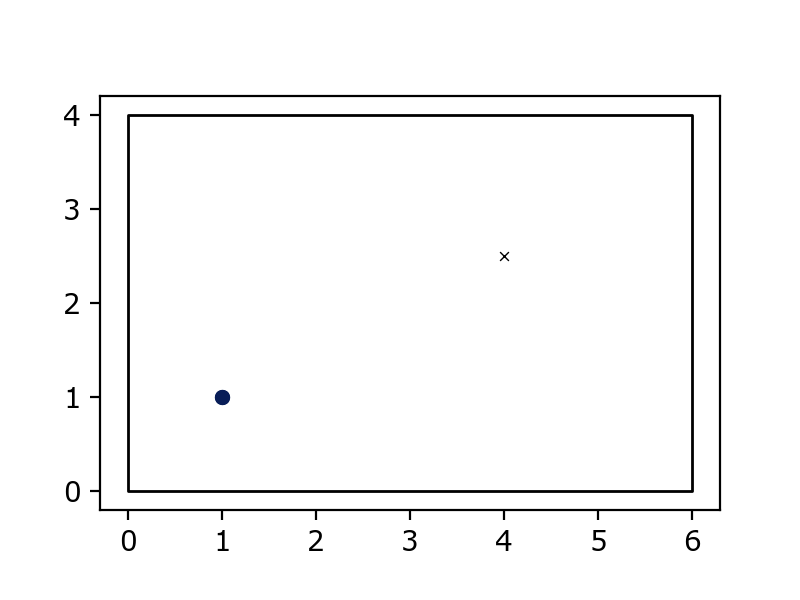

<IPython.core.display.Javascript object>


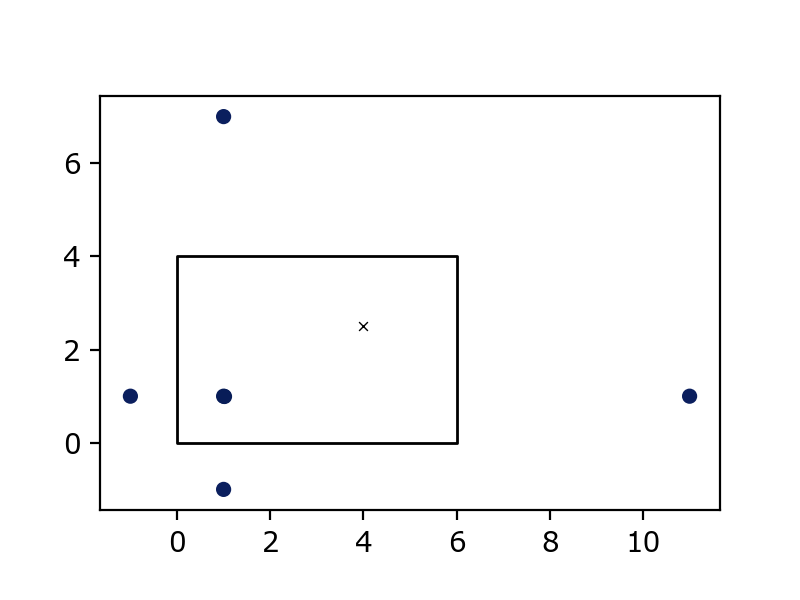

<IPython.core.display.Javascript object>


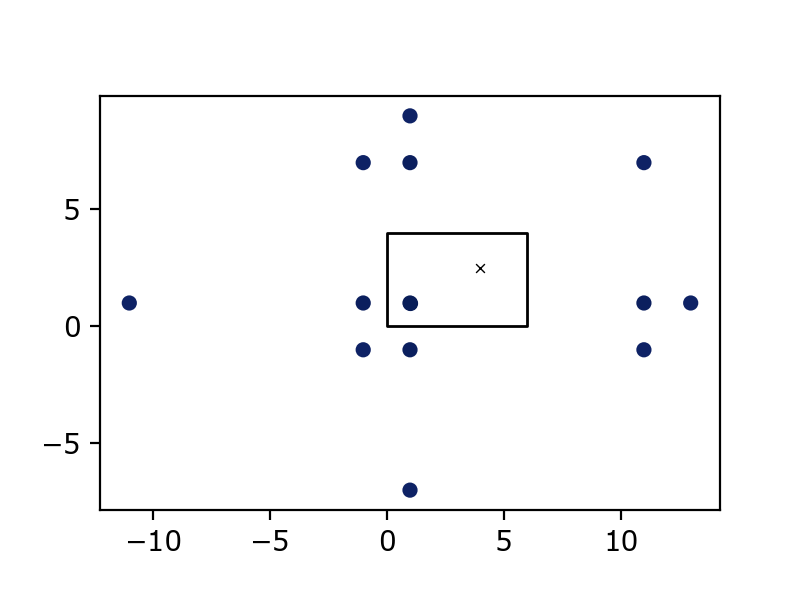

<IPython.core.display.Javascript object>


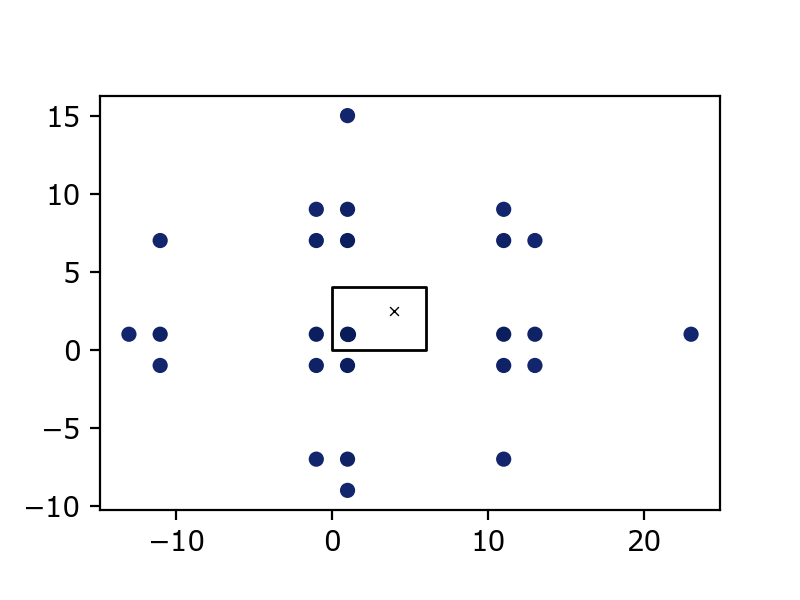

<IPython.core.display.Javascript object>


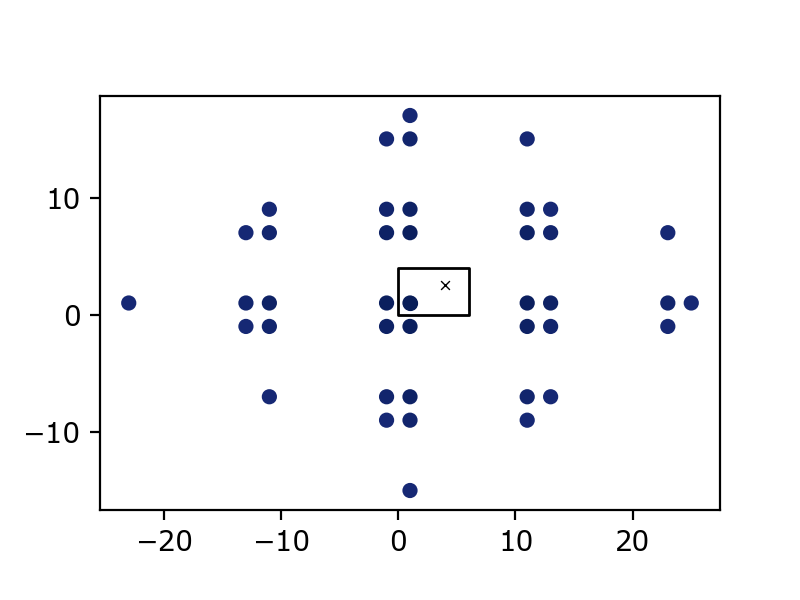

In [6]:
figsize = (4, 3)
for o in range(5):
    room.plot(img_order=o, figsize=figsize)